<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/Task/pandas_%EC%8B%A4%EC%8A%B5_train_0603_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

값은 요금구간을 좀 더 조정해서 값은 더 좋게 나왔는데 요금구간으로 나누면 pclass와 승객수가 차이가 많이 나는 것 같음.\
그래서 그 값을 주려보기로 함.\
Accuracy: 0.8435754189944135

Task4. train.csv 파일로 생존자 예측 모델 생성을 위한 분석용 데이터 셋을 작성하세요

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# 데이터 불러오기
file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/m_3_datas/train.csv'
# file_path = 'train.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# 성별을 숫자로 바꿈
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [ ]:
# 결측치 확인
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

# 'Title' 열 추가
df['Title'] = df['Name'].apply(extract_title)

# 호칭별 나이 평균 계산
title_age_mean = df.groupby('Title')['Age'].mean()

# 결측치를 호칭별 평균값으로 대체
for title, age_mean in title_age_mean.items():
    df.loc[(df['Age'].isnull()) & (df['Title'] == title), 'Age'] = age_mean

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
# 필요 없는 열 제거
df.drop(columns = ['PassengerId','Name','Ticket','Cabin', 'Title'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [ ]:
# # 결측치 처리 (예: Age 열의 결측치를 평균으로 대체)
# df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Age_group을 6개 범주로 확대
bins = [0,5,12,18,35,60,100]
labels = ['Infant','child','Teenager','Young Adult','Adult','Senior']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.drop(columns=['Age'], inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,0,1,0,7.2500,S,Young Adult
1,1,1,1,1,0,71.2833,C,Adult
2,1,3,1,0,0,7.9250,S,Young Adult
3,1,1,1,1,0,53.1000,S,Young Adult
4,0,3,0,0,0,8.0500,S,Young Adult


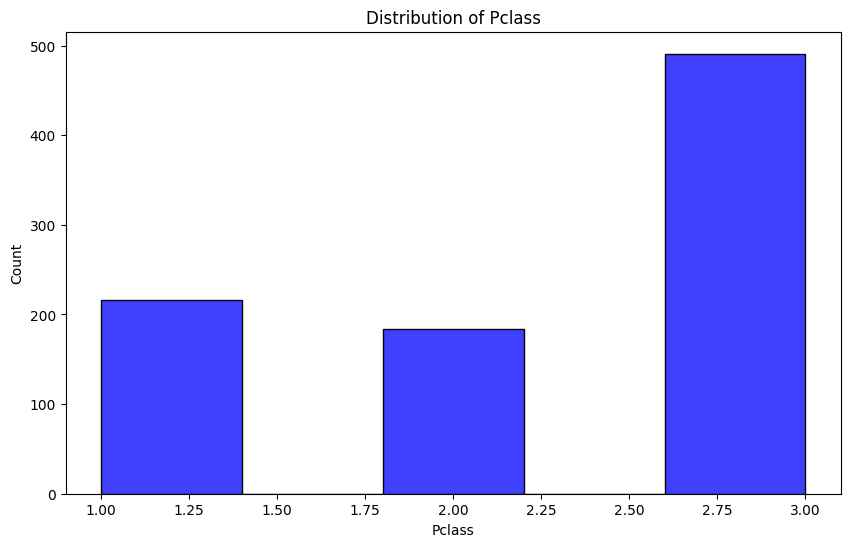

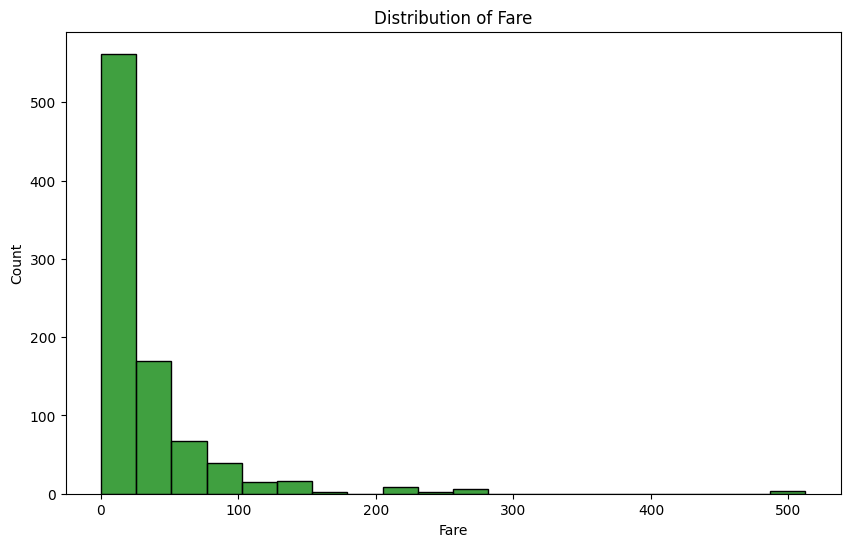

In [ ]:
# Pclass에 대한 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pclass', bins=5, kde=False, color='blue')
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Fare에 대한 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', bins=20, kde=False, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [ ]:
# 요금 분포 확인
fare_summary = df['Fare'].describe()
print(fare_summary)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [ ]:
# Fare를 3개의 범주로 변환
bins = [0, 25, 100, 600]
labels = ['Low', 'Medium', 'High']
df['Fare_bin'] = pd.cut(df['Fare'], bins=bins, labels=labels, include_lowest=True)

# 각 범주의 개수 출력
fare_bin_counts = df['Fare_bin'].value_counts()
print(fare_bin_counts)

Fare_bin
Low       557
Medium    281
High       53
Name: count, dtype: int64


In [ ]:
pclass_counts = df['Pclass'].value_counts()
print(pclass_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int64   
 3   SibSp      891 non-null    int64   
 4   Parch      891 non-null    int64   
 5   Fare       891 non-null    float64 
 6   Embarked   891 non-null    object  
 7   Age_group  891 non-null    category
 8   Fare_bin   891 non-null    category
dtypes: category(2), float64(1), int64(5), object(1)
memory usage: 50.9+ KB


In [ ]:
# One-Hot Encoding
# 범주형 변수를 더미 변수로 변환할 열 목록
categorical_columns = ['Age_group', 'Fare_bin', 'Embarked']

# 반복문을 사용하여 범주형 변수를 더미 변수로 변환
for column in categorical_columns:
    # 첫번쨰 카테고리는 drop_first=True로 제거
    df = pd.get_dummies(df, columns=[column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   Pclass                 891 non-null    int64  
 2   Sex                    891 non-null    int64  
 3   SibSp                  891 non-null    int64  
 4   Parch                  891 non-null    int64  
 5   Fare                   891 non-null    float64
 6   Age_group_Infant       891 non-null    bool   
 7   Age_group_child        891 non-null    bool   
 8   Age_group_Teenager     891 non-null    bool   
 9   Age_group_Young Adult  891 non-null    bool   
 10  Age_group_Adult        891 non-null    bool   
 11  Age_group_Senior       891 non-null    bool   
 12  Fare_bin_Low           891 non-null    bool   
 13  Fare_bin_Medium        891 non-null    bool   
 14  Fare_bin_High          891 non-null    bool   
 15  Embark

In [ ]:
# SibSp와 Parch 합쳐서 가족 규모 변수 생성
df['family_size'] = df['SibSp'] + df['Parch'] + 1   # 자기 자신 포함
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   Pclass                 891 non-null    int64  
 2   Sex                    891 non-null    int64  
 3   Fare                   891 non-null    float64
 4   Age_group_Infant       891 non-null    bool   
 5   Age_group_child        891 non-null    bool   
 6   Age_group_Teenager     891 non-null    bool   
 7   Age_group_Young Adult  891 non-null    bool   
 8   Age_group_Adult        891 non-null    bool   
 9   Age_group_Senior       891 non-null    bool   
 10  Fare_bin_Low           891 non-null    bool   
 11  Fare_bin_Medium        891 non-null    bool   
 12  Fare_bin_High          891 non-null    bool   
 13  Embarked_C             891 non-null    bool   
 14  Embarked_Q             891 non-null    bool   
 15  Embark

In [ ]:
# # 예시로 선택할 열 목록
# columns_of_interest = ['Survived','Age','Pclass','Sex','SibSp','Parch','Fare']

# # 선택한 열들로 새로운 데이터프레임 생성
# selected_df = df[columns_of_interest]

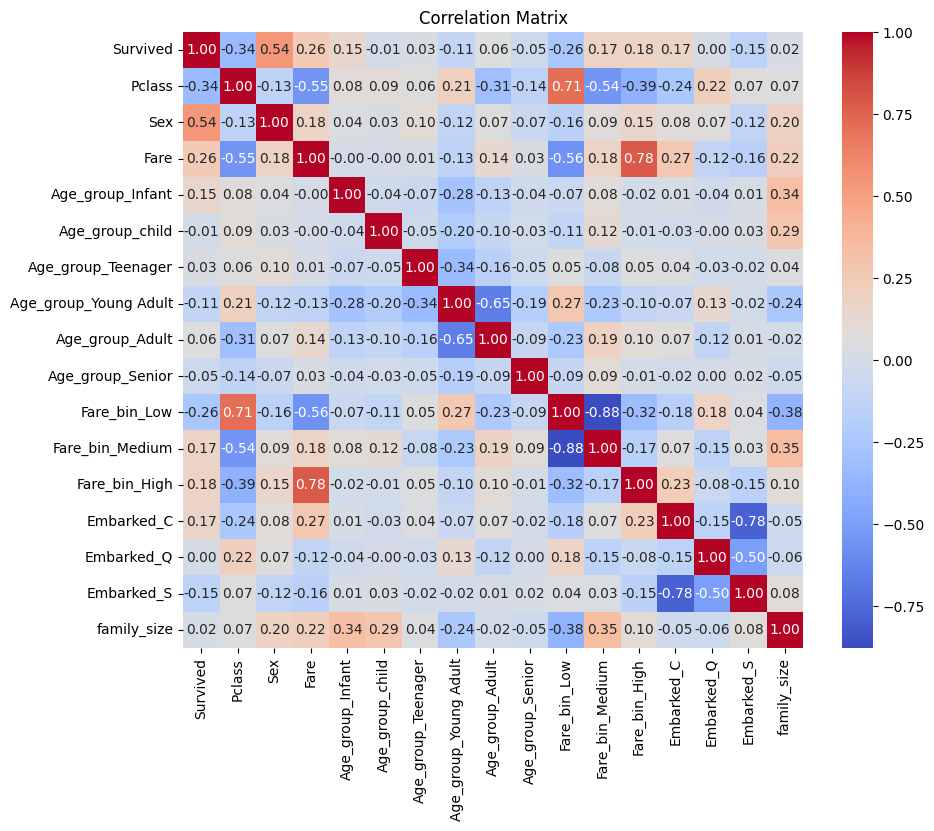

In [ ]:
# correlation_matrix = df.corr()

# # Heatmap으로 시각화
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

In [ ]:
print(df[['Pclass','Fare']])

     Pclass     Fare
0         3   7.2500
1         1  71.2833
2         3   7.9250
3         1  53.1000
4         3   8.0500
..      ...      ...
886       2  13.0000
887       1  30.0000
888       3  23.4500
889       1  30.0000
890       3   7.7500

[891 rows x 2 columns]


In [ ]:
# 타겟 변수와 피처 변수 설정
X = df.drop('Survived', axis=1)
y = df['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

(712, 16) (179, 16) (712,) (179,)
Accuracy: 0.8435754189944135
